<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB1/blob/main/6351071072_LAB1_BAI2_Trang28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Câu 1 trang 28
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Nguyễn Đức Trung_6351071072")
sns.set(style="whitegrid")
df = pd.read_csv('bank.csv', sep=';')

target_col = 'subscribe' if 'subscribe' in df.columns else 'y'
df['target_num'] = df[target_col].map({'yes': 1, 'no': 0})

print("--- 5 dòng đầu tiên ---")
print(df.head())

print("\n--- Thông tin tổng quan ---")
df.info()

print("\n--- Thống kê mô tả ---")
print(df.describe())

Nguyễn Đức Trung_6351071072
--- 5 dòng đầu tiên ---
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  cellular   19   oct        79         1     -1         0  unknown  no   
1  cellular   11   may       220         1    339         4  failure  no   
2  cellular   16   apr       185         1    330         1  failure  no   
3   unknown    3   jun       199         4     -1         0  unknown  no   
4   unknown    5   may       226         1     -1         0  unknown  no   

   target_num  
0           0  
1           0  
2   

In [3]:
#câu 2 trang 28
print("Nguyễn Đức Trung _ 6351071072")
df.replace('unknown', np.nan, inplace=True)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("\n--- 5 thuộc tính thiếu dữ liệu nhiều nhất ---")
print(missing_data.head(5))

Nguyễn Đức Trung _ 6351071072

--- 5 thuộc tính thiếu dữ liệu nhiều nhất ---
           Total    Percent
poutcome    3705  81.950896
contact     1324  29.285556
education    187   4.136253
job           38   0.840522
age            0   0.000000


Nguyễn Đức Trung _ 6351071072


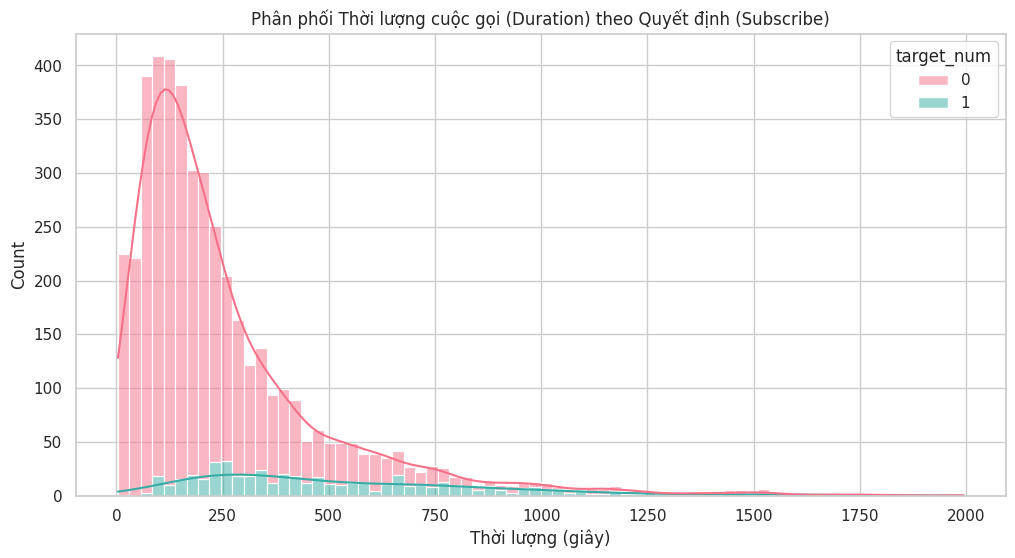

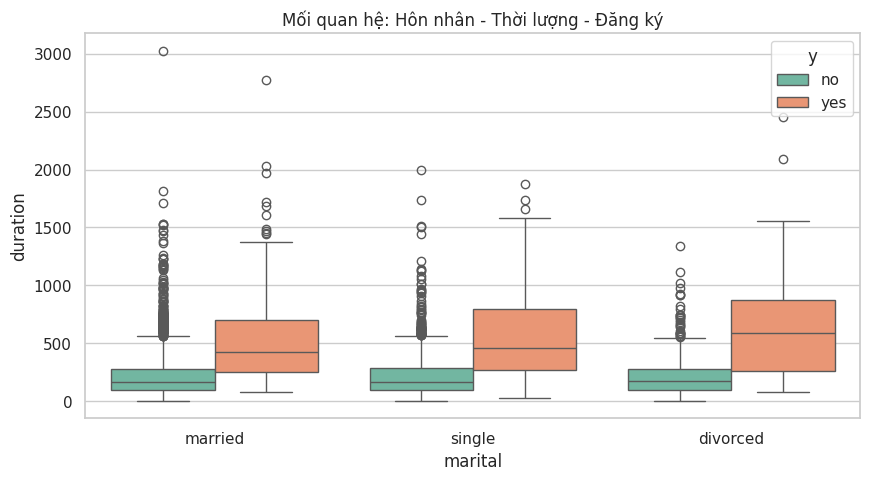

In [5]:
#câu 3 trang 28
print("Nguyễn Đức Trung _ 6351071072")
plt.figure(figsize=(12, 6))
data_plot = df[df['duration'] < 2000]
sns.histplot(
    data=data_plot,
    x='duration',
    hue='target_num', # 0: No, 1: Yes
    multiple='stack',
    kde=True,
    palette='husl'
)
plt.title('Phân phối Thời lượng cuộc gọi (Duration) theo Quyết định (Subscribe)')
plt.xlabel('Thời lượng (giây)')
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x='marital', y='duration', hue=target_col, data=df, palette='Set2')
plt.title('Mối quan hệ: Hôn nhân - Thời lượng - Đăng ký')
plt.show()

Nguyễn Đức Trung _ 6351071072


/tmp/ipython-input-4037476733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


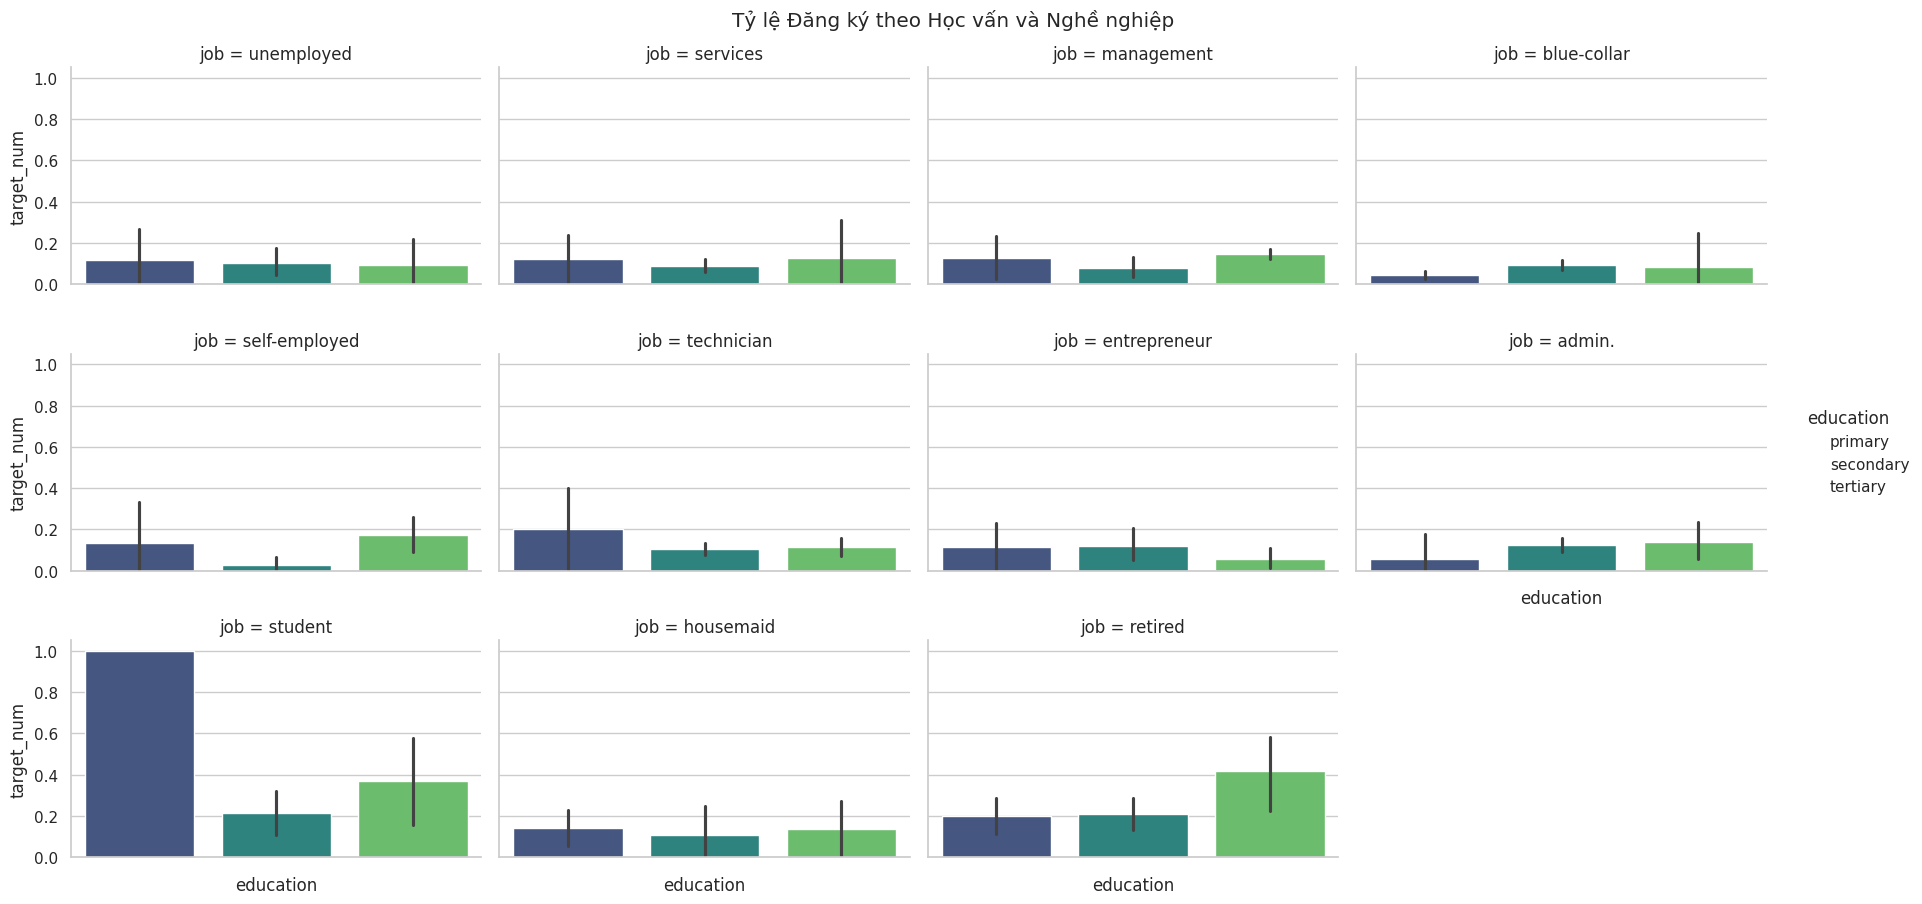

In [9]:
#câu 4
print("Nguyễn Đức Trung _ 6351071072")
g = sns.catplot(
    x='education',
    y='target_num',
    col='job', # Phân biệt theo nghề nghiệp
    data=df,
    kind='bar',
    col_wrap=4, # Ngắt dòng nếu quá nhiều nghề
    height=3,
    aspect=1.5,
    palette='viridis'
)
g.set_xticklabels(rotation=45)
g.fig.suptitle('Tỷ lệ Đăng ký theo Học vấn và Nghề nghiệp', y=1.02)
plt.show()

Nguyễn Đức Trung _ 6351071072

--- 5. Thống kê và khảo sát Nhóm Thời lượng (Duration Group) ---
duration_group
1-3min     1720
3-5min     1046
5-10min     841
<1min       492
>10min      422
Name: count, dtype: int64


/tmp/ipython-input-4281409122.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_group', y='target_num', data=df, palette='Spectral')


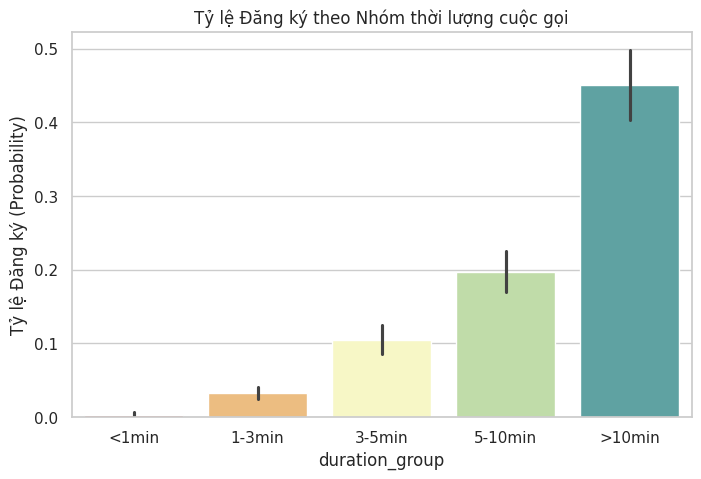

In [11]:
#Câu 5
print("Nguyễn Đức Trung _ 6351071072")
print("\n--- 5. Thống kê và khảo sát Nhóm Thời lượng (Duration Group) ---")
bins = [0, 60, 180, 300, 600, 5000]
labels = ['<1min', '1-3min', '3-5min', '5-10min', '>10min']

df['duration_group'] = pd.cut(df['duration'], bins=bins, labels=labels)
print(df['duration_group'].value_counts())

plt.figure(figsize=(8, 5))
sns.barplot(x='duration_group', y='target_num', data=df, palette='Spectral')
plt.title('Tỷ lệ Đăng ký theo Nhóm thời lượng cuộc gọi')
plt.ylabel('Tỷ lệ Đăng ký (Probability)')
plt.show()

In [12]:
#Câu 6
print("Nguyễn Đức Trung _ 6351071072")
print("\n--- 6. Tiền xử lý dữ liệu ---")

cols_to_drop = ['default']
df_clean = df.drop(columns=cols_to_drop, errors='ignore')
print(f"Đã xóa cột: {cols_to_drop}")
mode_edu = df_clean['education'].mode()[0]
df_clean['education'].fillna(mode_edu, inplace=True)
mean_dur = df_clean['duration'].mean()
df_clean['duration'].fillna(mean_dur, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_to_encode = ['job', 'marital', 'education', 'loan', 'housing', 'contact']
for col in cols_to_encode:
    if col in df_clean.columns:

        df_clean[col] = df_clean[col].astype(str)
        df_clean[col] = le.fit_transform(df_clean[col])
        print(f"Đã mã hóa cột: {col}")

Nguyễn Đức Trung _ 6351071072

--- 6. Tiền xử lý dữ liệu ---
Đã xóa cột: ['default']
Đã mã hóa cột: job
Đã mã hóa cột: marital
Đã mã hóa cột: education
Đã mã hóa cột: loan
Đã mã hóa cột: housing
Đã mã hóa cột: contact


/tmp/ipython-input-121136624.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['education'].fillna(mode_edu, inplace=True)
/tmp/ipython-input-121136624.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try